# Practico Mentoria - Aprendizaje Supervisado

Vamos a tratar de predecir el resultado de un partido para el equipo local, es decir, si el equipo local gana (**Win**), empata (**Draw**) o pierde (**Lose**).

---

### Importaciones

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn import preprocessing

from utils import plot_confusion_matrix

In [ ]:
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga del Dateset

In [4]:
data_df = pd.read_csv('../Datasets/football_data.csv')

print("Shape 'data_df'  = {}".format(data_df.shape))

Shape 'data_df'  = (322, 37)


In [5]:
data_df.head()

,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose,label
0,-5,-8,2,1,0,0,1,0,77.0,69.0,...,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514,Draw
1,4,-2,4,1,0,0,1,0,76.0,79.0,...,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922,Draw
2,18,7,6,6,0,0,1,0,81.0,81.0,...,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728,Lose
3,1,1,2,3,0,0,1,0,79.0,65.0,...,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839,Win
4,1,1,3,1,0,0,1,0,74.0,73.0,...,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079,Draw


In [6]:
data_df.dtypes

home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

### Obtemos el `input` y el `target` para los modelos

> Obtenemos el `target`

In [7]:
target_data = data_df.loc[:, 'label']

In [8]:
print("Shape 'target_data' = {}".format(target_data.shape))
display(target_data.head())
print('=' * 30)
display(target_data.dtypes)

Shape 'target_data' = (322,)


0    Draw
1    Draw
2    Lose
3     Win
4    Draw
Name: label, dtype: object

dtype('O')

In [9]:
target_data.unique()

array(['Draw', 'Lose', 'Win'], dtype=object)

Win     155
Lose     90
Draw     77
Name: label, dtype: int64

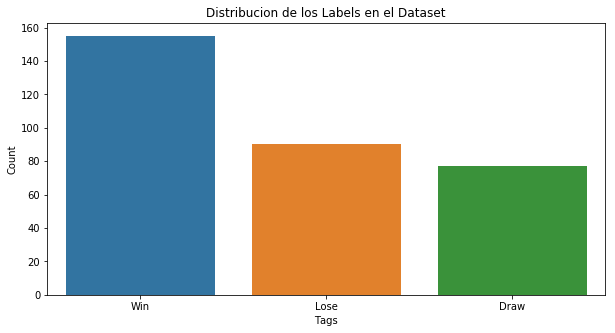

In [10]:
# TODO: Plotear la distribucion de los targets

plt.figure(figsize=(10, 5))

target_count = target_data.value_counts()
display(target_count)
my_order = ["Win", "Lose", "Draw"]

sns.barplot(target_count.index, target_count.values, order=my_order)
plt.title('Distribucion de los Labels en el Dataset')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.show()

> Obtenemos el `input_data`

In [13]:
input_data = data_df.drop('label', axis=1)

In [14]:
print("Shape 'input_data' = {}".format(input_data.shape))
display(input_data.head())
print('=' * 30)
display(input_data.dtypes)

Shape 'input_data' = (322, 36)


,home_team_goals_difference,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518,League_24558,home_player_1_overall_rating,home_player_2_overall_rating,...,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,B365_Win,B365_Draw,B365_Lose,BW_Win,BW_Draw,BW_Lose
0,-5,-8,2,1,0,0,1,0,77.0,69.0,...,72.0,71.0,73.0,73.0,0.395683,0.287770,0.316547,0.389704,0.287782,0.322514
1,4,-2,4,1,0,0,1,0,76.0,79.0,...,74.0,76.0,71.0,72.0,0.624582,0.238903,0.136516,0.612713,0.253365,0.133922
2,18,7,6,6,0,0,1,0,81.0,81.0,...,88.0,78.0,90.0,88.0,0.390698,0.260465,0.348837,0.380496,0.279776,0.339728
3,1,1,2,3,0,0,1,0,79.0,65.0,...,79.0,81.0,81.0,79.0,0.360875,0.287606,0.351519,0.354839,0.290323,0.354839
4,1,1,3,1,0,0,1,0,74.0,73.0,...,69.0,67.0,76.0,76.0,0.651526,0.223380,0.125093,0.634855,0.224066,0.141079


home_team_goals_difference         int64
away_team_goals_difference         int64
games_won_home_team                int64
games_won_away_team                int64
games_against_won                  int64
games_against_lost                 int64
League_21518                       int64
League_24558                       int64
home_player_1_overall_rating     float64
home_player_2_overall_rating     float64
home_player_3_overall_rating     float64
home_player_4_overall_rating     float64
home_player_5_overall_rating     float64
home_player_6_overall_rating     float64
home_player_7_overall_rating     float64
home_player_8_overall_rating     float64
home_player_9_overall_rating     float64
home_player_10_overall_rating    float64
home_player_11_overall_rating    float64
away_player_1_overall_rating     float64
away_player_2_overall_rating     float64
away_player_3_overall_rating     float64
away_player_4_overall_rating     float64
away_player_5_overall_rating     float64
away_player_6_ov

> ### División de datos en conjuntos de Entrenamiento, Validacion y Test

La primer tarea consiste en dividir el conjunto de datos cargado en el apartado anterior en conjuntos de Entrenamiento (o _training_), Validacion (_validation_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para Entrenamiento, 20% para Validacion y el 10% para Evaluacion.

Links:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.1, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.22, random_state=0)

print(len(X_train)/len(input_data))
print(len(y_train)/len(target_data))
print(len(X_val)/len(input_data))
print(len(y_val)/len(target_data))
print(len(X_test)/len(input_data))
print(len(y_test)/len(target_data))

0.6987577639751553
0.6987577639751553
0.19875776397515527
0.19875776397515527
0.10248447204968944
0.10248447204968944


> ### Distribucion de los labels en los conjuntos de datos generados

Mostrar en un grafico, como se distribuyen los labels en los conjuntos de datos generados.

**Hint**: Usar graficos de barra (_bar plot_).

Win     108
Draw     60
Lose     57
Name: label, dtype: int64

Win     30
Lose    23
Draw    11
Name: label, dtype: int64

Win     17
Lose    10
Draw     6
Name: label, dtype: int64

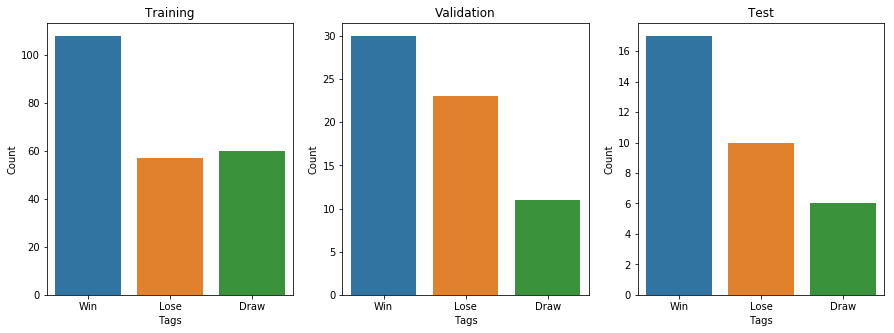

In [41]:
plt.figure(figsize=(15, 5))
my_order = ["Win", "Lose", "Draw"]

plt.subplot(1, 3, 1)
train_count = y_train.value_counts()
display(train_count)
sns.barplot(train_count.index, train_count.values, order=my_order)
plt.title('Training')
plt.xlabel('Tags')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
val_count = y_val.value_counts()
display(val_count)
sns.barplot(val_count.index, val_count.values, order=my_order)
plt.title('Validation')
plt.xlabel('Tags')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
test_count = y_test.value_counts()
display(test_count)
sns.barplot(test_count.index, test_count.values, order=my_order)
plt.title('Test')
plt.xlabel('Tags')
plt.ylabel('Count')


plt.show()

> ### Modelo Baseline

Implementar un modelo Baseline usando, por ejemplo **Logistic Regression** sin ajuste de Hiperparametros.

Calcular la accuracy en los conjuntos de entrenamiento y validacion.

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)

/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [158]:
baseline_log_regr = LogisticRegression(random_state=42, C=1e+4, solver='liblinear', max_iter=100, n_jobs=-1)
baseline_log_regr.fit(X_train, y_train)

train_baseline_log_regr_prediction = balanced_accuracy_score(y_train, baseline_log_regr.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_baseline_log_regr_prediction))

val_baseline_log_regr_prediction = balanced_accuracy_score(y_val, baseline_log_regr.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_baseline_log_regr_prediction))

Accuracy para entrenamiento: 0.63
Accuracy para validación   : 0.46


/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


> ### Seleccion de Clasificadores

Comparar la performance entre clasificadores:
* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Hint** para mejores resultados:
* Usar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) y [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

> **Plotear los resultados en un grafico**

In [192]:
test_score_dict = {
    "baseline_logistic_regresion": {
        "train_score": train_baseline_log_regr_prediction,
        "val_score": val_baseline_log_regr_prediction
    }
}

In [201]:
# PCA
pca=PCA(n_components=4, svd_solver='full', random_state=4, whiten=True)
pca.fit(X_train)
X_pca_train=pca.transform(X_train)

print("shape of X_pca", X_pca_train.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:4]))

pca.fit(X_val)
X_pca_val=pca.transform(X_val)

pca.fit(X_test)
X_pca_test=pca.transform(X_test)

shape of X_pca (225, 4)
[0.32097746 0.28312434 0.05036438 0.03869774]
suma: 0.6931639179979137


> ### 1. Random Forest

In [215]:
random_forest_param = {'clf__criterion': ["gini", "entropy"],
                  'clf__random_state': [1, 10, 20, 30, 40, 50, 100],
                  'clf__min_samples_split': [2, 4, 8], 
                  'clf__max_features': ["auto", "sqrt", "log2", None]}

#['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes',
#'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 
#'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

random_forest = RandomForestClassifier(n_estimators=10)
random_forest_pipeline = Pipeline([('dm_reduce', pca), ('clf', random_forest)])
random_forest_clf = GridSearchCV(random_forest_pipeline, random_forest_param, scoring='accuracy', cv=3, iid=False, n_jobs=-1)
random_forest_clf.fit(X_train, y_train)
best_random_forest_clf = random_forest_clf.best_estimator_

train_random_forest_prediction = balanced_accuracy_score(y_train, best_random_forest_clf.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_random_forest_prediction))

val_random_forest_prediction = balanced_accuracy_score(y_val, best_random_forest_clf.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_random_forest_prediction))

test_score_dict["random_forest"] = {
    "train_score": train_random_forest_prediction,
    "val_score": val_random_forest_prediction
}

Accuracy para entrenamiento: 0.86
Accuracy para validación   : 0.38


> ### 2. Ada Boost

In [214]:
ada_boost_param = {'clf__n_estimators':(10, 50, 100),
                   'clf__algorithm': ("SAMME", "SAMME.R"),
                   'clf__random_state':(1, 10, 20, 30, 40, 50, 100)}

ada_boost = AdaBoostClassifier()
ada_boost_pipeline = Pipeline([('dm_reduce', pca), ('clf', ada_boost)])
ada_boost_clf = GridSearchCV(ada_boost_pipeline, ada_boost_param, scoring='accuracy', cv=3, iid=False, n_jobs=-1)
ada_boost_clf.fit(X_train, y_train)
best_ada_boost_clf = ada_boost_clf.best_estimator_

train_ada_boost_prediction = balanced_accuracy_score(y_train, best_ada_boost_clf.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_ada_boost_prediction))

val_ada_boost_prediction = balanced_accuracy_score(y_val, best_ada_boost_clf.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_ada_boost_prediction))

test_score_dict["ada_boost"] = {
    "train_score": train_ada_boost_prediction,
    "val_score": val_ada_boost_prediction
}

Accuracy para entrenamiento: 0.51
Accuracy para validación   : 0.49


> ### 3. K-Neighbors

In [213]:
knn_param = {'clf__n_neighbors':(3, 4, 5, 6),
             'clf__weights':('uniform', 'distance'),
             'clf__algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
             'clf__leaf_size':(15, 30, 60),
             'clf__p':(1, 2)}

knn = KNeighborsClassifier()
knn_pipeline = Pipeline([('dm_reduce', pca), ('clf', knn)])
knn_clf = GridSearchCV(knn_pipeline, knn_param, scoring='accuracy', cv=3, iid=False, n_jobs=-1)
knn_clf.fit(X_train, y_train)
best_knn_clf = knn_clf.best_estimator_

train_knn_prediction = balanced_accuracy_score(y_train, best_knn_clf.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_knn_prediction))

val_knn_prediction = balanced_accuracy_score(y_val, best_knn_clf.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_knn_prediction))

test_score_dict["knn"] = {
    "train_score": train_knn_prediction,
    "val_score": val_knn_prediction
}

Accuracy para entrenamiento: 1.00
Accuracy para validación   : 0.40


In [270]:
knn25_param = {#'clf__n_neighbors':(3, 4, 5, 6),
             'clf__weights':('uniform', 'distance'),
             'clf__algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
             #'clf__leaf_size':(15, 30, 60),
             'clf__p':(1, 2)
}

knn25 = KNeighborsClassifier(n_neighbors=25)
knn25_pipeline = Pipeline([('dm_reduce', pca), ('clf', knn25)])
knn25_clf = GridSearchCV(knn25_pipeline, knn25_param, scoring='accuracy', cv=3, iid=False, n_jobs=-1)
knn25_clf.fit(X_train, y_train)
best_knn25_clf = knn25_clf.best_estimator_

train_knn25_prediction = balanced_accuracy_score(y_train, best_knn25_clf.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_knn25_prediction))

val_knn25_prediction = balanced_accuracy_score(y_val, best_knn25_clf.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_knn25_prediction))

test_score_dict["knn25"] = {
    "train_score": train_knn25_prediction,
    "val_score": val_knn25_prediction
}

Accuracy para entrenamiento: 0.47
Accuracy para validación   : 0.51


> ### 4. Logistic Regression

In [212]:
log_regr_param = {'clf__C':(1e+4, 1e+3, 1e+2),
                  'clf__solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
                  'clf__max_iter':(5, 20, 100, 1000, 2000),
                  'clf__random_state':(1, 10, 20, 30, 40, 50, 100)}

log_regr = LogisticRegression()
log_regr_pipeline = Pipeline([('dm_reduce', pca), ('clf', log_regr)])
log_regr_clf = GridSearchCV(log_regr_pipeline, log_regr_param, scoring='accuracy', cv=3, iid=False, n_jobs=-1)
log_regr_clf.fit(X_train, y_train)
best_log_regr_clf = log_regr_clf.best_estimator_

train_log_regr_prediction = balanced_accuracy_score(y_train, best_log_regr_clf.predict(X_train))
print("Accuracy para entrenamiento: {:.2f}".format(train_log_regr_prediction))

val_log_regr_prediction = balanced_accuracy_score(y_val, best_log_regr_clf.predict(X_val))
print("Accuracy para validación   : {:.2f}".format(val_log_regr_prediction))

test_score_dict["logistic_regression"] = {
    "train_score": train_log_regr_prediction,
    "val_score": val_log_regr_prediction
}

Accuracy para entrenamiento: 0.42
Accuracy para validación   : 0.46


/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/gian/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


> ### Matriz de Confusion

Plotear la matriz de confusion del mejor modelo sobre el conjunto de **Test**.

**Hint**: Usar la funcion `plot_confusion_matrix` del modulo `utils`.

Confusion matrix, without normalization
[[14  0  3]
 [ 8  2  0]
 [ 5  1  0]]


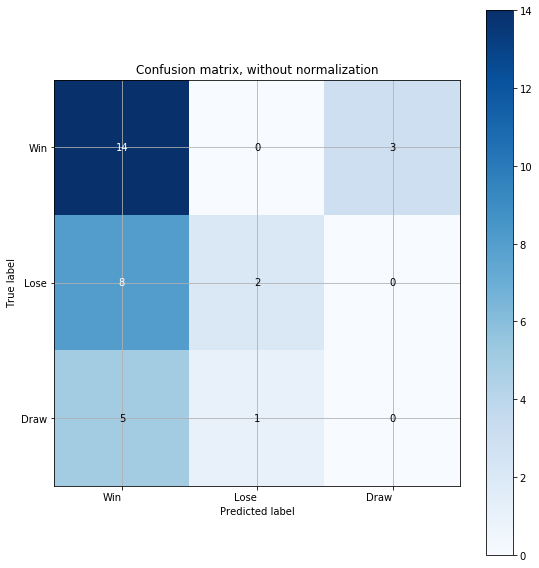

In [272]:
plot_confusion_matrix(y_test, best_ada_boost_clf.predict(X_test), my_order, normalize=False)

> ### Classification Report

Imprimir el `classification_report` y explicar lo que refleja este reporte.

In [271]:
import json
print(json.dumps(test_score_dict, sort_keys=True, indent=4))

{
    "ada_boost": {
        "train_score": 0.5080571799870045,
        "val_score": 0.49139218269653046
    },
    "baseline_logistic_regresion": {
        "train_score": 0.6287524366471735,
        "val_score": 0.4567413263065436
    },
    "knn": {
        "train_score": 1.0,
        "val_score": 0.4044356609574001
    },
    "knn25": {
        "train_score": 0.46673164392462635,
        "val_score": 0.5068511198945981
    },
    "logistic_regression": {
        "train_score": 0.4197530864197531,
        "val_score": 0.4628019323671498
    },
    "random_forest": {
        "train_score": 0.8618583495776478,
        "val_score": 0.3765480895915679
    }
}


El reporte en la seccion anterior es un listado de los clasificadores entrenados. Se muestra el nombre del Clasificador y su "accuaracy" obtenido tanto para los Datos de Entrenamiento, asi como para los de Validacion.

El objetivo general del reporte es identificar rapidamente que Clasificador puede llegar a dar la mejor performance para los datos de Test; y es aqui que gana importancia tener el score de validacion, porque nos da una mejor de idea de como se va a comportar el clasificador con los datos de test ya que muchas veces nuestro clasificador overfitea los datos de entranamiento y luego se comporta mal en la realidad.

Este es el caso del KNN, cuyo score de entrenamiento es 100% pero en el momento que se le cambian los datos de entrada, no solo falla bastante estrepitozamente, sino que ademas aparecen otros clasificadores cuyo train score era menor al 50% que terminan brindado una mejor performance con los mismo datos reales (por ejemplo el Logistic Regression).

De todas formas dado facicilidad con la que se pueden comparar clasificadores con este reporte, se pudo indentificar claramente este caso de overfiteo, por lo que se decidio entrenar otro KNN con un numero mayor de vecinos a tener en cuenta, y tras correr un par de preubas manuales, resulto ser 25 el numero de vecinos que maximizaba el Validation Score y terminó siendo el mejor calsificador de todos, como se puede apreciar en el reporte.

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.

En esta Notebook vamos a entrenar varios clasificadores para determinar el resultado de un partido para el equipo local, es decir, si el equipo local gana (Win), empata (Draw) o pierde (Lose). Los Clasificadores elegidos son:

- RandomForestClassifier
- AdaBoostClassifier
- KNeighborsClassifier
- LogisticRegression

Para entrenar nuestros modelos se decide dividir nuestro dataset en 3 partes:

- Train set (80%)
- Validation set (10%)
- Test set (10%)

Esto último resultó muy util para detectar overfitting antes de llegar a probar el Test set.

Al momento se corroborar la performance del modelo con el Test set, se ópto por utilizar una Matriz de confusion.

Se seleccion el calsificador ADA Boost por ser ligeramente mas performante que el KNN con 25 vecinos.